In [1]:
#Basic python library which need to import
import pandas as pd
import numpy as np

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for Nice graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os



In [2]:
#set working directory
os.chdir("H:\Data Science\Project2")

In [4]:
#load data
credit_data= pd.read_csv("H:\Data Science\Project2\credit-card-data.csv")

In [5]:
credit_data.head(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
###DATA PREPROCESSING

In [6]:
###########MISSING VALUE ANALYSIS
#create dataframe with missing percentage
missing_val=pd.DataFrame(credit_data.isnull().sum())


In [53]:
missing_val

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [14]:
#there are missing val in credit limit and minimum payment
#we have to slect method to fill those missing values 

In [17]:
#renaming variable
missing_val=missing_val.rename(columns={'index':'variables',0:'Missing_percentage'})

In [22]:
#converting into percentage
missing_val['Missing_percentage']=(missing_val['Missing_percentage']/len(credit_data))*100

In [24]:
missing_val

,Missing_percentage
CUST_ID,0.000000
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [46]:
#creating missing values first choose a particular values delte it and find using diff method
credit_data['CREDIT_LIMIT'].loc[5]

1800.0

In [ ]:
#imputation method
#actual value=1800
#using mean=4494.7505
#using median=3000.0

In [47]:
#make value null
credit_data['CREDIT_LIMIT'].loc[5]=np.nan

In [50]:
credit_data['CREDIT_LIMIT'].loc[5]

3000.0

In [42]:
#impute using mean
#credit_data['CREDIT_LIMIT']=credit_data['CREDIT_LIMIT'].fillna(credit_data['CREDIT_LIMIT'].mean())

In [7]:
#impute using median
credit_data['CREDIT_LIMIT']=credit_data['CREDIT_LIMIT'].fillna(credit_data['CREDIT_LIMIT'].median())

In [2]:
#impute using median
credit_data['MINIMUM_PAYMENTS']=credit_data['MINIMUM_PAYMENTS'].fillna(credit_data['MINIMUM_PAYMENTS'].median())

NameError: name 'credit_data' is not defined

In [4]:
#load data
credit_data= pd.read_csv("H:\Data Science\Project2\credit_data.csv")

In [5]:
credit_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,istallment
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223,0.000000,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,one_off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,0.028494,6.660231,istallment
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,1000.0,275.861322,312.343947,0.000000,6,50.000000,0.000000,0.019183,0.883197,istallment
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,0.023399,0.986076,istallment
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,0.026915,0.942505,none


# DERIVING NEW API

In [6]:
#MONTHLY AVG PURCHASE
credit_data['Monthly_avg_purchase']=credit_data['PURCHASES']/credit_data['TENURE']

In [7]:
#Monthly Cash Advance
credit_data['Monthly_cash_advance']=credit_data['CASH_ADVANCE']/credit_data['TENURE']

In [8]:
#Limit_usage (balance to credit limit ratio ) credit card utilization
credit_data['limit_usage']=credit_data['BALANCE']/credit_data['CREDIT_LIMIT']

In [10]:
#Payment to minimum payment ratio
credit_data['payment_minpay']=credit_data['PAYMENTS']/credit_data['MINIMUM_PAYMENTS']

In [ ]:
#find  oneoff prchasse and installment purchase  details

In [11]:
credit_data[(credit_data['ONEOFF_PURCHASES']==0) & (credit_data['INSTALLMENTS_PURCHASES']==0)].shape


(2042, 23)

In [12]:
credit_data[(credit_data['ONEOFF_PURCHASES']>0) & (credit_data['INSTALLMENTS_PURCHASES']==0)].shape


(1874, 23)

In [13]:
credit_data[(credit_data['ONEOFF_PURCHASES']>0) & (credit_data['INSTALLMENTS_PURCHASES']>0)].shape


(2774, 23)

In [14]:
credit_data[(credit_data['ONEOFF_PURCHASES']==0) & (credit_data['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 23)

# we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour

In [32]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [16]:
credit_data['purchase_type']=credit_data.apply(purchase,axis=1)

In [17]:
credit_data['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [18]:
credit_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,istallment
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223,0.000000,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,one_off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,0.028494,6.660231,istallment
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,1000.0,275.861322,312.343947,0.000000,6,50.000000,0.000000,0.019183,0.883197,istallment
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,0.023399,0.986076,istallment
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,0.026915,0.942505,none


In [30]:
#save output results
credit_data.to_csv("credit_data.csv",index=False)

In [2]:
credit_data= pd.read_csv("H:\Data Science\Project2\credit_data.csv")

In [3]:
######outlier Analysis
###log transformation for make data uniform
# log tranformation
log_credit=credit_data.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [20]:
log_credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [4]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=log_credit[[x for x in log_credit.columns if x not in col ]]

# Insights from KPIs

# Average payment_minpayment ratio for each purchse type.

In [5]:
x=credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

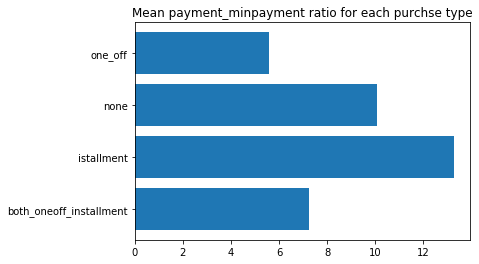

In [7]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')


In [ ]:
#### customers with installment purchases are paying dues 

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

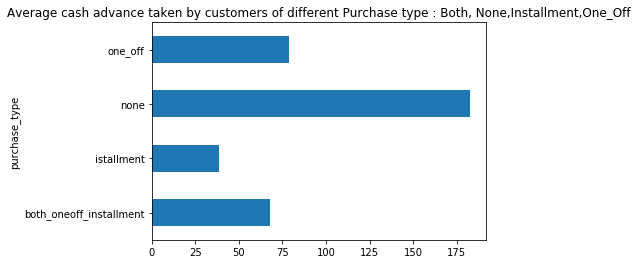

In [8]:
credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

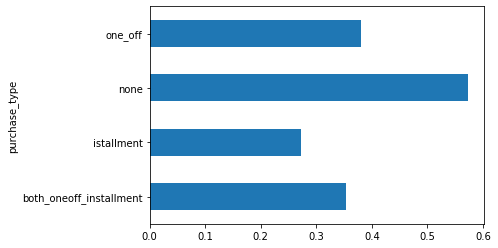

In [9]:
credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

# PREPARING MACHINE LEARNING ALGORITHM

In [10]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit_data.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

C:\Users\rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


In [24]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [25]:
cr_dummy

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both_oneoff_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,istallment,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.693147,0.000000,5.677165,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.902377,0.000000,0.028095,2.036042,istallment,0,1,0,0
8946,0.693147,0.000000,5.707110,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.931826,0.000000,0.019002,0.632971,istallment,0,1,0,0
8947,0.606136,0.000000,4.979489,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,3.221539,0.000000,0.023129,0.686161,istallment,0,1,0,0
8948,0.606136,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,0.000000,1.959127,0.026559,0.663978,none,0,0,1,0


In [12]:
l=['purchase_type']

In [13]:
cr_dummy=cr_dummy.drop(l,axis=1)

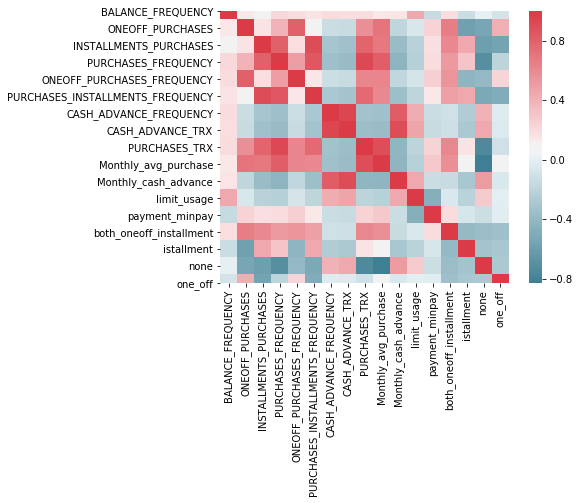

In [14]:
cr_dummy
#set hwight and width of a plot on which we want to draw the correlation and analysis
f,ax=plt.subplots(figsize=(7,5))
#generate corr matrix
#extreme red highly correlated data like wise etc
corr=cr_dummy.corr()
#plot using seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [ ]:
#IT shows no  features are correlated so we will not drop any feature

In [15]:
#load library
from sklearn.cluster import KMeans
#estimate optimum no of clusters
cluster_range=range(1,20)
cluster_errors=[]
for num_cluster in cluster_range:
    clusters=KMeans(num_cluster).fit(cr_dummy.iloc[:,0:4])
    cluster_errors.append(clusters.inertia_)

In [16]:
#create dataframe for cluster error for easy understanding
cluster_df=pd.DataFrame({"num_cluster":cluster_range,"cluster_error":cluster_errors})

In [17]:
cluster_df

,num_cluster,cluster_error
0,1,180256.060845
1,2,92982.562816
2,3,48537.226344
3,4,14810.551788
4,5,11079.002682
5,6,8945.616141
6,7,7371.244156
7,8,5958.863579
8,9,5229.052460
9,10,4712.690857


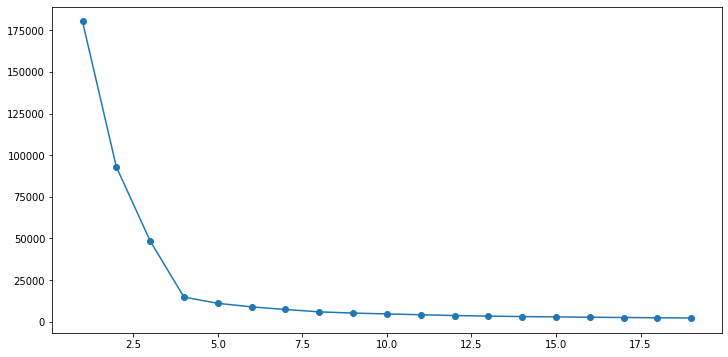

In [20]:
#plot line chart to visualize it
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_cluster,cluster_df.cluster_error,marker="o")

In [26]:
cr_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both_oneoff_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,istallment,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off,0,0,0,1


In [ ]:
#for cluster =3 there is a curve after which it became constant in the graph

In [28]:
#so develop model for k=3
kmeans_model=KMeans(n_clusters=3).fit(cr_dummy.iloc[:,0:13])

In [29]:
##summarize the model
pd.crosstab(cr_dummy['purchase_type'],kmeans_model.labels_)

col_0,0,1,2
purchase_type,,,
both_oneoff_installment,2707,3,64
istallment,0,49,2211
none,0,2042,0
one_off,1303,571,0
